# Frist, importing all needed pacakges

In [105]:
## Importing packages
#Pandas for the dataframe
import pandas as pd

# Matplotlib for Data visualisations
import matplotlib.pyplot as plt 

# Import Seaborn for a more sophisticated visualistaions 
import seaborn as sns 
# Import numpy 
import numpy as np 

# Reading in the data into assigned variables, with the Year and Date being the indexed cols for Annual, and Quarterly data, respectively
## Starting with France's BOP quraterly data, from FRED
Quarterly BOP (in ? billions). unstandardised.

In [106]:
## For France's BOP quraterly data, from FRED
bop_qurarterly= pd.read_csv('sourcecode/FRED_bop_france_quarterly.csv', index_col=0)

### Rename the data column
bop_qurarterly.columns= [ 'bop_quarterly']
print(bop_qurarterly.head(2))

            bop_quarterly
DATE                     
01/01/1999       4.384390
01/04/1999       4.847956


## France's GDP, quarterly, from FRED
Quarterly GDP (in € Millions). unstandardised

In [107]:
## France's GDP, quarterly, from FRED
gdp_quarterly= pd.read_csv('sourcecode\FRED_euros_france_gdp_quarterly.csv', index_col=0)
# Renaming the data coloumn
gdp_quarterly.columns= ['gdp_quarterly']


## France's quarteerly investments data, in euros, from FRED
Quarterly investments ( in € Millions??). unstandardised

In [108]:
 ## France's quarteerly investments data, in euros, from FRED

investments_quarterly= pd.read_csv('sourcecode\FRED_euros_investments_quarterly.csv', index_col=0)
 # Renaming the col
investments_quarterly.columns= ['investments_quarterly']

## Exchange rate EUR/USD
unstandardised

In [109]:
 # Exchange rate US/EUR, with Date col indexed
us_eur_quarterly = pd.read_csv('sourcecode\FRED_exchage_rate_quarterly.csv', index_col=0)
# Renaming the column
us_eur_quarterly.columns= ['$/€ Quarterly']
### Inversing the currency exchange from $/€ to €/$
eur_us_quarterly= 1/ us_eur_quarterly
eur_us_quarterly.columns= ['exchange_rate_quarterly']
print(eur_us_quarterly.head(4))

            exchange_rate_quarterly
DATE                               
01/01/1999                 0.892523
01/04/1999                 0.946312
01/07/1999                 0.953036
01/10/1999                 0.964477


## France's  annual goverment debt, from OECD
Annual goverment debt (% of GDP). unstandardised.

In [110]:
## France's  annual goverment debt, from OECD
whole_world_gov_debt_annual= pd.read_csv('sourcecode\OECD_gov_debt_annual.csv')
# Selecting for france 
gov_debt_annual = whole_world_gov_debt_annual[ whole_world_gov_debt_annual['LOCATION']=='FRA']
gov_debt_annual= gov_debt_annual.loc[:, [ 'TIME', 'Value']]
# Renaming
gov_debt_annual.columns= ['DATE', 'gov_debt_annual']
# Indexing
gov_debt_annual= gov_debt_annual.set_index('DATE')


## France Annual interest rates, OECD
 Annual Long Term Interest Rates ( in % ). Unstandardised.

In [111]:
 ## France Annual interest rates, OECD
interest_rates_annual=  pd.read_csv('sourcecode\OECD_interest_rates_annual.csv')
# Selecting
interest_rates_annual =  interest_rates_annual.loc[:, ['TIME', 'Value']]
# Renaming the columns
interest_rates_annual.columns= ['DATE', 'interest_rates_annual']
# Indexing
interest_rates_annual= interest_rates_annual.set_index('DATE')


## Frnace Quarterly interest rates, OECD
Quarterly Long Term Interest Rates ( in % ). Unstandardised.

In [112]:
 ## Frnace Quarterly interest rates, OECD
interest_rates_quarterly=  pd.read_csv('sourcecode\OECD_interest_rates_france_quarterly.csv')
### Selecting,  renaming, and indexing columns
interest_rates_quarterly =  interest_rates_quarterly.loc[:, ['TIME', 'Value']]
# Renaming the columns
interest_rates_quarterly.columns= ['DATE', 'interest_rates_quarterly']
# Indexing
interest_rates_quarterly= interest_rates_quarterly.set_index('DATE')


## France annual savings rate, OECD
Annual Savings rate ( %  GDP). Unstandardised

In [113]:
 ## France annual savings rate, OECD
savings_rate_annual = pd.read_csv('sourcecode\OECD_savings_rate_annual.csv')
savings_rate_annual = savings_rate_annual[ savings_rate_annual['LOCATION']=='FRA']
### Selecting
savings_rate_annual =  savings_rate_annual.loc[:, ['TIME', 'Value']]
# Renaming the columns
savings_rate_annual.columns= ['DATE', 'savings_rates_annual']
# Indexing the df to Year
savings_rate_annual= savings_rate_annual.set_index('DATE')


# I could not read the gross savings data!!
It appears this code: *ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66*##I could not read the gross savings data
It appears this code: *ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66*

# Transforming all index cols into data types, then converting them into a standard date format

# Down below, are all indiviual dataframe, all indexed, and set to be merged. 

In [125]:
# Via a for loop, we will convert all indexes types from object to dateTim
variables_names= [bop_qurarterly, gdp_quarterly, investments_quarterly, eur_us_quarterly, gov_debt_annual, interest_rates_quarterly, interest_rates_annual, savings_rate_annual]
for variable in variables_names:
    variable.index= pd.to_datetime(variable.index)
# Via a for loop convert all Quarterly data date format to yyyy-Qn
quarterly_variables= [bop_qurarterly, gdp_quarterly, investments_quarterly, eur_us_quarterly, interest_rates_quarterly]
for variable in quarterly_variables:
 variable['DATE'] = pd.PeriodIndex(variable.index, freq='Q')

investments_quarterly


,investments_quarterly,DATE
DATE,,
1999-01-01,7.047800e+10,1999Q1
1999-01-04,7.207500e+10,1999Q1
1999-01-07,7.384500e+10,1999Q1
1999-01-10,7.477400e+10,1999Q1
2000-01-01,7.697000e+10,2000Q1
...,...,...
2019-01-10,1.457720e+11,2019Q1
2020-01-01,1.311480e+11,2020Q1
2020-01-04,1.119450e+11,2020Q1


# Now, voila!

In [115]:
# A clear view of the dataframes
##They are cleaned, with date as their index
# Quarterly
bop_qurarterly

gdp_quarterly

investments_quarterly

eur_us_quarterly
interest_rates_quarterly
# Annual
gov_debt_annual

interest_rates_annual
savings_rate_annual


,savings_rates_annual
DATE,
1970-01-01 00:00:00.000001999,9.118922
1970-01-01 00:00:00.000002000,8.563187
1970-01-01 00:00:00.000002001,8.497075
1970-01-01 00:00:00.000002002,7.180433
1970-01-01 00:00:00.000002003,6.584242
1970-01-01 00:00:00.000002004,6.848104
1970-01-01 00:00:00.000002005,6.420674
1970-01-01 00:00:00.000002006,6.810266
1970-01-01 00:00:00.000002007,7.096520


# MERGING

In [116]:
# Viewing the column names of all variables 
print( bop_qurarterly.head(2))

print( gdp_quarterly.head(2))

print( investments_quarterly.head(2))

print(eur_us_quarterly.head(2))

print(gov_debt_annual.head(2))

print(interest_rates_annual.head(2))

print(interest_rates_quarterly.head(2))

print(savings_rate_annual.head(2)) 


            bop_quarterly    DATE
DATE                             
1999-01-01       4.384390  1999Q1
1999-01-04       4.847956  1999Q1
            gdp_quarterly    DATE
DATE                             
1999-01-01         344117  1999Q1
1999-01-04         347464  1999Q1
            investments_quarterly    DATE
DATE                                     
1999-01-01           7.047800e+10  1999Q1
1999-01-04           7.207500e+10  1999Q1
            exchange_rate_quarterly    DATE
DATE                                       
1999-01-01                 0.892523  1999Q1
1999-01-04                 0.946312  1999Q1
                               gov_debt_annual
DATE                                          
1970-01-01 00:00:00.000001999         74.01518
1970-01-01 00:00:00.000002000         72.42918
                               interest_rates_annual
DATE                                                
1970-01-01 00:00:00.000001999               4.608783
1970-01-01 00:00:00.000002000        

# For merging:
## - Annual data contain only the years. 
## - Quarterly data mostly contain date, in such format: 01/04/1999, only one had 1999-Q1. I have to changed the date format, for quarterly seperatley from the annual data.

### Decision: 
I will first merge annual data togehter, and make sure that is neat.
Then I will start on quarterly data: by matching the date format for all of them, then merge them.

# Merging Annual data of Interest rates, savings rates, and gov debt
They all share the same name, and type of cols

In [117]:
# Merging via outer
Annual_data= interest_rates_annual.merge( savings_rate_annual, on= 'DATE', how= 'outer')\
             .merge(gov_debt_annual, on= 'DATE', how= 'outer')
Annual_data

,interest_rates_annual,savings_rates_annual,gov_debt_annual
DATE,,,
1970-01-01 00:00:00.000001999,4.608783,9.118922,74.01518
1970-01-01 00:00:00.000002000,5.394467,8.563187,72.42918
1970-01-01 00:00:00.000002001,4.939458,8.497075,71.47308
1970-01-01 00:00:00.000002002,4.861217,7.180433,75.16156
1970-01-01 00:00:00.000002003,4.130892,6.584242,79.07757
1970-01-01 00:00:00.000002004,4.099167,6.848104,80.54945
1970-01-01 00:00:00.000002005,3.409442,6.420674,82.14224
1970-01-01 00:00:00.000002006,3.795742,6.810266,77.26933
1970-01-01 00:00:00.000002007,4.303200,7.096520,75.94181


# Spliting the Anuual dataframe to two uses
## 1. A print-out Annual dataframe

In [118]:
Annual_data

,interest_rates_annual,savings_rates_annual,gov_debt_annual
DATE,,,
1970-01-01 00:00:00.000001999,4.608783,9.118922,74.01518
1970-01-01 00:00:00.000002000,5.394467,8.563187,72.42918
1970-01-01 00:00:00.000002001,4.939458,8.497075,71.47308
1970-01-01 00:00:00.000002002,4.861217,7.180433,75.16156
1970-01-01 00:00:00.000002003,4.130892,6.584242,79.07757
1970-01-01 00:00:00.000002004,4.099167,6.848104,80.54945
1970-01-01 00:00:00.000002005,3.409442,6.420674,82.14224
1970-01-01 00:00:00.000002006,3.795742,6.810266,77.26933
1970-01-01 00:00:00.000002007,4.303200,7.096520,75.94181


## 2. A to-work-with Annual dataframe
I am worried of the repercussions of copying a dataframe. Therefore, we will save it for last.
So, with that being said, We will keep on using the variable Annual data.

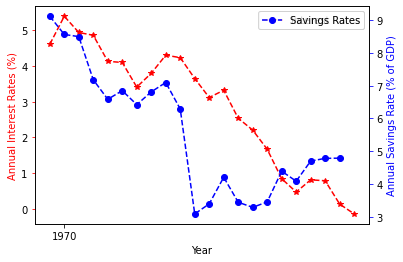

In [119]:
# Goofing around
fig, ax = plt.subplots()
ax.plot(Annual_data.index, Annual_data['interest_rates_annual'], color= 'red', label= 'Interest Rates', marker= '*', linestyle= '--')

ax.set_xlabel('Year')
ax.set_ylabel('Annual Interest Rates (%)', color= 'red')
ax.tick_params('y', color= 'red')

ax2= ax.twinx()
ax2.plot(Annual_data.index, Annual_data['savings_rates_annual'], color= 'blue', label= 'Savings Rates', marker= 'o', linestyle= '--')
ax2.set_ylabel('Annual Savings Rate (% of GDP)', color= 'blue')
ax2.tick_params('y', color= 'blue')
ax.legend()
ax2.legend()
plt.show()

# And Now, The Quarterly data
Here , we will centralise all quarterly data into one dataframe.
The Quarterly data that we have right now are: _GDP, BOP, interest rates,exchange rate, and investments_

In [120]:
bop_qurarterly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 1999-01-01 to 2020-01-07
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   bop_quarterly  87 non-null     float64      
 1   DATE           87 non-null     period[Q-DEC]
dtypes: float64(1), period[Q-DEC](1)
memory usage: 2.0 KB


In [121]:
print(bop_qurarterly.head(2))
print(gdp_quarterly.head(2))
print(investments_quarterly.head(2))
print(eur_us_quarterly.head(2))
print(interest_rates_quarterly.head)

            bop_quarterly    DATE
DATE                             
1999-01-01       4.384390  1999Q1
1999-01-04       4.847956  1999Q1
            gdp_quarterly    DATE
DATE                             
1999-01-01         344117  1999Q1
1999-01-04         347464  1999Q1
            investments_quarterly    DATE
DATE                                     
1999-01-01           7.047800e+10  1999Q1
1999-01-04           7.207500e+10  1999Q1
            exchange_rate_quarterly    DATE
DATE                                       
1999-01-01                 0.892523  1999Q1
1999-01-04                 0.946312  1999Q1
<bound method NDFrame.head of             interest_rates_quarterly    DATE
DATE                                        
1998-10-01                  4.085800  1998Q4
1999-01-01                  3.944167  1999Q1
1999-04-01                  4.203567  1999Q2
1999-07-01                  5.004567  1999Q3
1999-10-01                  5.282833  1999Q4
...                              ...   

In [122]:
# 
bop_qurarterly

gdp_quarterly

investments_quarterly

eur_us_quarterly
interest_rates_quarterly
# Creating quarterly_data


,interest_rates_quarterly,DATE
DATE,,
1998-10-01,4.085800,1998Q4
1999-01-01,3.944167,1999Q1
1999-04-01,4.203567,1999Q2
1999-07-01,5.004567,1999Q3
1999-10-01,5.282833,1999Q4
...,...,...
2019-10-01,-0.047200,2019Q4
2020-01-01,-0.080867,2020Q1
2020-04-01,-0.005433,2020Q2
